# Partial Differential Equation Training

- Student 1 Name: Ans Imran
- Student 2 Name: Richard Awde

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

 ## Linear Convection

The 1-D Linear Convection equation is the simplest, most basic model that can be used to learn something about PDE. Here it is:
$\frac{\partial u}{\partial t}+c\frac{\partial u}{\partial x}=0$.
c is a velocity, whereas u can be any advected quantity. For example it can be the concentration of some polutant in a river flowing at speed c.


With given initial conditions (understood as a wave), the equation represents the propagation of that initial wave with speed c
, without change of shape. Let the initial condition be $u(x,0)=u0(x)$
. Then the exact solution of the equation is $u(x,t)=u0(x−ct)$
(See lecture this morning).


We discretize this equation in both space and time, using the Forward Difference scheme for the time derivative and the Backward Difference scheme for the space derivative. Consider discretizing the spatial coordinate x  into points that we index from $i=0$ to $N$ , and stepping in discrete time intervals of size $dt$.




We use the following convention : $U^{n}_i$ is the amplitude of the wave at time $t=n \times dt$, and at $x=i \times dx$

How woud you approximate $\frac{\partial u}{\partial t}$ , using $U^{n}_i$, with a forward difference sheme ?

### Approximating $ \frac{\partial u}{\partial t} $ to first order is very simple!
We, simply use taylor expansion, and use the right value to calculate the left value.
$$ \frac{\partial U^{n}_{i}}{\partial t} \approx \frac{U^{n+1}_{i} - U^{n}_{i}}{ dt} $$

How woud you approximate $\frac{\partial u}{\partial x}$ , using $U^{n}_i$, with a backward difference sheme ?


We, agin simply use taylor expansion, but this time we use the left value to calculate the right value.
$$ \frac{\partial U^{n}_{i}}{\partial x} \approx \frac{U^{n}_{i} - U^{n}_{i-1}}{ dx } $$

Write the first order explicit integration scheme we will use, in function of $U^{n}_i$, c, dt, dx, $U^{n}_i$ and $U^{n}_{i-1}$

$$ U^{n+1}_i = U^{n}_{i} - \left( \frac{c dt}{dx} \right) (U^{n}_{i} - U^{n}_{i-1})  $$

Now let's try implementing this in Python.

We want to define an evenly spaced grid of points within a  domain that is 2 units of length wide, i.e., 0<x_i<2. Variable $nx$ which will be the number of grid points we want and dx will be the distance between two adjacent grid points. we define the following values 

In [2]:
nx      =  41                  # This will be changed latter
dx      =  2 / (nx-1)

nt      =  25                  # nt is the number of timesteps we want to calculate
Delta_T =  0.625               # time of integration
dt      =  Delta_T/(nt*1.0)    # dt is lentgh  of each time step 

c       =  1                   # assume advection velocity  is c = 1

We also need to set up our initial conditions. The initial concentration u0
 is given as  u=2 in the interval 0.5≤x≤1.5 and u=1
 everywhere else in (0,2)  (i.e., a hat function). Build U

In [3]:
def u(u0_1, u0_2, u0_3, xi, xf, xb1, xb2, space_step):
    '''
    This fucntion will work when the domain is split into three intervals. E.g in our case the three intervals are
    [0,0.5) , [0.5,1.5] , (1.5, 2]
    
    u0_1 value of Ux at time 0, in interval [0,0.5)
    u0_2 value of Ux at time 0, in interval [0.5,1.5]
    u0_3 value of Ux at time 0, in interval (1.5,2]
    ux   the concantenated Ux  in  interval [0,2]
    
    xb1: The first point at which the interval is broke i.e. 0.5
    xb2: The second point at which the interval is broke i.e. 1.5
    '''
    x  = np.arange(xi, xf + space_step, space_step)          # arange will generate [xi,xf), but we want [xi,xf], so that's why we used arange(xi, xf + dx)
                                                             # if we won't include xf, we won't get 41 total points in total

    u1 = np.squeeze( np.full( (1, int( (xb1 - xi)/dx) ), 1) )             # jahan domain [a,b) is form ki ho, vahan seedha seedha (b - a)/dx
    u2 = np.squeeze( np.full( (1, int( ((xb2 - xb1)/dx + 1) )), 2) )      # jahan domain [] is form ki hay vahan, + 1 add kro gay tb hi real # of pts milain gay 
    u3 = np.squeeze( np.full( (1, int( (xb1 - xi)/dx) ), 1) )             # jahan domain (a,b] is form ki ho, vahan seedha seedha (b - a)/dx
    
    ux = np.concatenate((u1,u2,u3))
    return x, ux

plot, U, your initial concentration profile.


Text(0, 0.5, 'Ux (no units decided yet)')

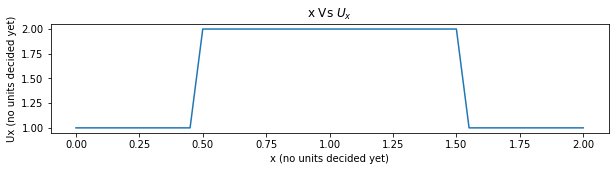

In [4]:
ax, Uxi = u(1, 2, 1, 0, 2, 0.5, 1.5, dx)

plt.figure(figsize=(10,2))
plt.title('x Vs $U_{x}$')
plt.plot(ax, Uxi)
plt.xlabel('x (no units decided yet)')
plt.ylabel('Ux (no units decided yet)')

#### Why doesn't the hat function have perfectly straight sides? Think for a bit.

### Because of the way we defined the function, we defined it to be
$$ f = 1, x = 0.45$$
and
$$ f = 2,x = 0.5 $$

in the domain (0.45, 0.5), we did not assign any value to function. So, the plotter automatically assumed it to be a sloped
line, in the domain (0.45, 0.5)

The same is also true for the domain (1.5, 1.55)

Now we implement the discretization of the convection equation using finit-difference scheme. For every element i of our array $U^{n}_i$ we need to perform the operation define above ($U^{n+1}_i$).  We'll store the result in a new (temporary) array Un, which will be the next state of U  for the next time-step. We will repeat this operation for as many time-steps as we specify and then we can see how far the concentration profile has convected.

We will need also boundary conditions, so for the moment we will only use periodic boundary conditions (what leaves from the right, re-enters at the left)

 The code is the following :
 
 1) define U at time =0, dt, dx, c etc...
 
 2) compute Un as a function of U and all other information.
 
 3) Take care of boundary conditions at the edges 
 
 4) Time=Time+dt
 
 5) go back to 2
 

Boundary conditions: Explain how you compute $U^{n}_0$ and $U^{N}_i$ ?

#### Since, for the moment, we are told to use periodic boundary conditions (what leaves from the right, re-enters at the left), so, we'll use periodic boundary conditions. In case of periodic boundary conditions, we can simply take
$$ U_{0}^{n + 1} = U_{J}^{n} $$
And, since information is propagating from left to right, therefore, we can compute $ U_{J} $ from $ U_{J-1} $, so we have no need to define $ U_{J} $ in advance

Write the code...

In [5]:
import scipy as sc
from scipy import sparse

sigma = c*dt/dx
Ux0   = 1                 # the value U_{0}^{0}


#creating the bi diagonal matrix A
diag1    = np.squeeze( np.full((1, nx), 1 - sigma) )
diag1[0] = Ux0
diag2    = np.squeeze( np.full((1, nx - 1), sigma) )
diag     = [diag1, diag2]
A = sparse.diags(diag, [0, -1]).toarray()


# Creating a 'nx by nt' matrix, succesive columns will contain the values of U_{i}^{0}, U_{i}^{1}, U_{i}^{2},.... and so on 
results = np.zeros((nx, nt))
results[:,0] = Uxi


# this function will perfom the matrix multiplications
def computations(time_steps, result_matrix, A_matrix):
    for i in range(time_steps - 1):
        result_matrix[:,i+1] = np.matmul(A_matrix, result_matrix[:,i])
        A_matrix[0,0] = result_matrix[-1,i+1]/result_matrix[0,i]       # this line makes sure that  U_{0}^{n+1} = U_{J}^{n}
    return result_matrix


results = computations(nt, results, A)

### PLot U at different times: 3 time steps, 12 time steps, 25 time steps

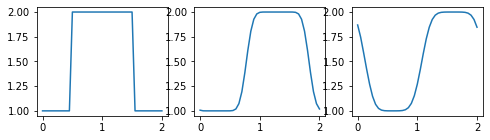

In [6]:
# 3 time steps

fig, axes = plt.subplots(1, 3, figsize=(8,2))
for i in range(3):
    axes[i].plot(ax, results[:,12*i])

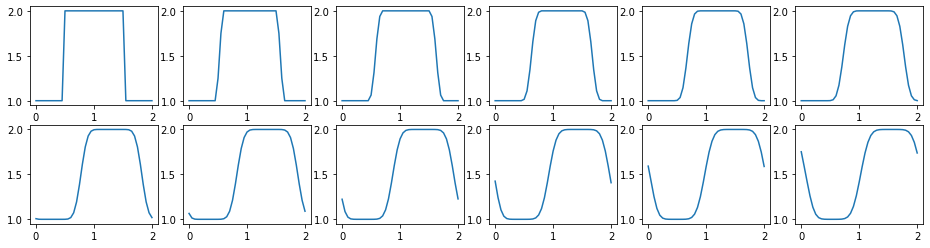

In [7]:
# 12 time steps

fig, axes = plt.subplots(2, 6, figsize=(16,4))
for i in range(6):
    axes[0,i].plot(ax, results[:,2*i])
for i in range(6):
    axes[1,i].plot(ax, results[:,12 + 2*i])

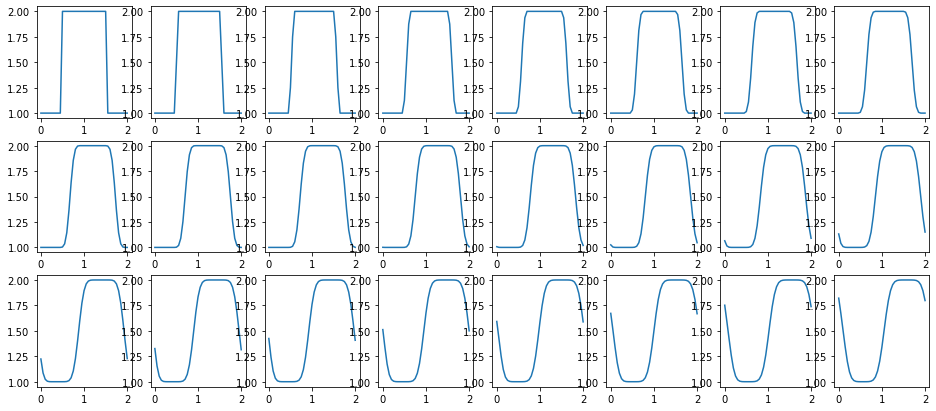

In [8]:
# 25 time steps

fig, axes = plt.subplots(3, 8, figsize=(16,7))
for i in range(8):
    axes[0,i].plot(ax, results[:,i])
for i in range(8):
    axes[1,i].plot(ax, results[:,8 + i])
for i in range(8):
    axes[2,i].plot(ax, results[:,16 + i])

### What do you notice ? 

We see that:
- The sharp edges become smoother with the passage of time.
- With the passage of time, the wave packet is moving to the right.
- The boundary conditions are working perfectly fine, as $ U_{0}^{n+1} = U_{J}^{n} $ all the time!

What is the value of CFL=dt C / dx ? 

In [9]:
CFL = dt*c/dx
CFL

0.5

Redo the same computation, vayring dt , for CFL>1. and CFL << 1

dt: 0.000625
CFL: 0.012499999999999999


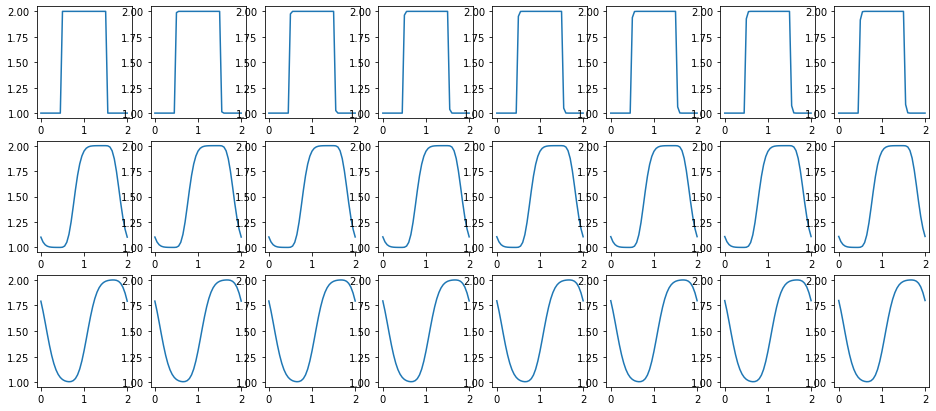

In [10]:
# CFL<<1

# We'll change dt by changing 'nt'
nt =  1000;   dt = Delta_T/(nt*1.0);   print(f'dt: {dt}')                     # dividing the interval into 1000 steps

sigma = c*dt/dx;   print(f'CFL: {sigma}');   Ux0   = 1

diag1 = np.squeeze( np.full((1, nx), 1 - sigma) );    diag1[0] = Ux0
diag2 = np.squeeze( np.full((1, nx - 1), sigma) );    diag     = [diag1, diag2]

A = sparse.diags(diag, [0, -1]).toarray()

results = np.zeros((nx, nt)); results[:,0] = Uxi; results = computations(nt, results, A)


#plotting the data
# 1000 time steps
fig, axes = plt.subplots(3, 8, figsize=(16,7))
for i in range(8):                              # steps 0 - 7
    axes[0,i].plot(ax, results[:,i])
for i in range(8):                              # steps 500 - 507
    axes[1,i].plot(ax, results[:,500 + i])
for i in range(8):                              # steps 990 - 997
    axes[2,i].plot(ax, results[:,990 + i])

dt: 0.078125
CFL: 1.5625


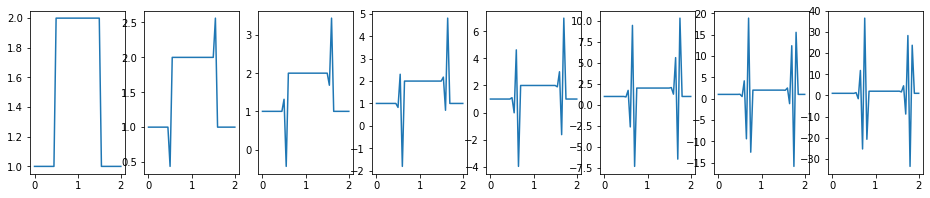

In [94]:
# CFL>1

nt =  8;   dt = Delta_T/(nt*1.0);   print(f'dt: {dt}')                     # dividing the interval into 8 steps
sigma = c*dt/dx;   print(f'CFL: {sigma}');   Ux0   = 1

diag1 = np.squeeze( np.full((1, nx), 1 - sigma) );    diag1[0] = Ux0
diag2 = np.squeeze( np.full((1, nx - 1), sigma) );    diag     = [diag1, diag2]
A = sc.sparse.diags(diag, [0, -1]).toarray()

results = np.zeros((nx, nt)); results[:,0] = Uxi;   results = computations(nt, results, A)


# 8 time steps
fig, axes = plt.subplots(1, 8, figsize=(16,3))
for i in range(8):
    axes[i].plot(ax, results[:,i])

### What do you notice ? What is the good integration conditions ?

- We changed dt by changing the number of steps, in the time interval 0,...0.625
- For CFL > 1, the results are disastrous for the original wave packet. The original shape of the Wavepacket deformed pretty quickly
- For CFL << 1, We saw that the wavepacket mainted it's general original form, at least in the qualitative sense.
#### So, CFL << 1, is a good integration condition.

### Now redo the computation, with CFL>1 and using an initial U that is gaussian.

dt: 0.078125
CFL: 1.5625


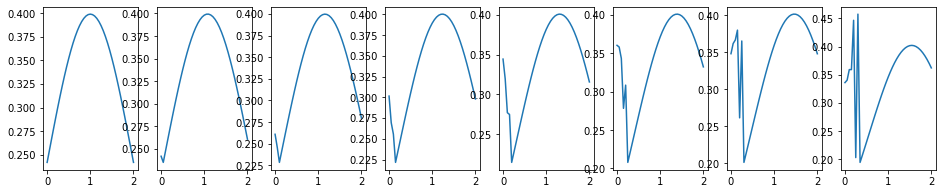

In [11]:
#generating a gaussian U
a = np.arange(0, 2 + dx, dx);   Uxi = (1/np.sqrt(2*np.pi)*1)*(np.exp( -0.5 * ((a - 1)/1)**2 ))
# Standard deviation   = 1
# Centered at position = 1


# CFL>1

nt =  8;   dt = Delta_T/(nt*1.0);   print(f'dt: {dt}')                     # dividing the interval into 8 steps
sigma = c*dt/dx;   print(f'CFL: {sigma}');   Ux0   = 1

diag1 = np.squeeze( np.full((1, nx), 1 - sigma) );    diag1[0] = Ux0
diag2 = np.squeeze( np.full((1, nx - 1), sigma) );    diag     = [diag1, diag2]
A = sc.sparse.diags(diag, [0, -1]).toarray()

results = np.zeros((nx, nt)); results[:,0] = Uxi;   results = computations(nt, results, A)


# 8 time steps
fig, axes = plt.subplots(1, 8, figsize=(16,3))
for i in range(8):
    axes[i].plot(ax, results[:,i])

### What do you notice ?

#### We notice that the CFL > 1 spells disastor for the gaussian wavepacket also

If you have time : Redo the same thing using a 2nd order space integrator, like leap frog (see lecture). For the leap frog the space and time derivative is taken as follows=
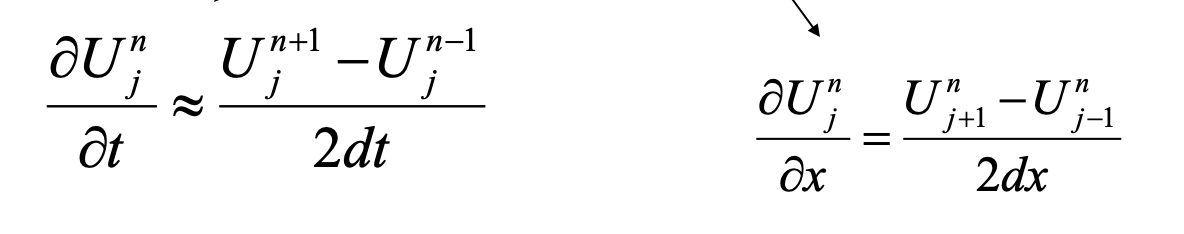

This is a very interesting exercise, but since our exams are on our heads, so, we won't be able to do it, before exams.